In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

Saving Test_dataset.xlsx to Test_dataset.xlsx
Saving Train_dataset.xlsx to Train_dataset.xlsx


{'Test_dataset.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00!\x8cF:s\x01\x00\x00\x8c\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 3.0MB/s 
     |████████████████████████████████| 1.6MB 8.7MB/s 
     |████████████████████████████████| 266kB 20.0MB/s 
     |████████████████████████████████| 66.1MB 58kB/s 
     |████████████████████████████████| 13.9MB 50.1MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 1.8MB 43.8MB/s 
     |████████████████████████████████| 266kB 46.4MB/s 
     |████████████████████████████████| 174kB 49.9MB/s 
     |████████████████████████████████| 6.8MB 39.5MB/s 
     |████████████████████████████████| 552kB 45.3MB/s 
     |████████████████████████████████| 153kB 45.2MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 163kB 35.7MB/s 
     |████████████████████████████████| 327kB 48.6MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 6.0MB 45.6MB/s 
     |████████████████████████████████| 1.1MB 39.8MB/s 

In [ ]:
train.head(5)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [ ]:
test.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [ ]:
from pycaret.regression import *
reg1 = setup(train, target ='Covid Cases',silent = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6269
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(787, 16)"
4,Missing Values,True
5,Numeric Features,10
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
gbr = create_model('gbr', verbose = False)
catboost = create_model('catboost', verbose = False)
svm = create_model('svm', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [ ]:
blend_top_5 = blend_models(estimator_list = [gbr,catboost,svm,lightgbm,xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2138.3620,27250049.8650,5220.1580,0.6428,0.4249,0.3698
1,1276.0516,6957014.3868,2637.6153,0.9383,0.2578,0.1948
2,1355.4030,5292773.4731,2300.6028,0.7178,0.4074,0.3536
3,1316.1101,6457982.9830,2541.2562,0.5464,0.5232,0.4875
4,5204.0442,549848742.7364,23448.8538,0.3441,0.5827,0.4877
5,4666.3836,260746703.3244,16147.6532,0.6691,0.5595,0.5555
6,1736.3652,11119249.1901,3334.5538,0.5769,0.3728,0.3181
7,4481.3052,170678044.3485,13064.3807,0.5694,0.5163,0.4562
8,5565.6893,301861645.3232,17374.1660,0.5964,0.5193,0.3455
9,1183.8961,4922033.9250,2218.5657,0.6270,0.4706,0.4178


In [ ]:
stack2 = stack_models(estimator_list = [gbr,catboost,lightgbm,xgboost], meta_model = svm, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.0246,90133188.0260,9493.8500,-0.1815,0.9450,0.4302
1,3658.1938,123992538.0192,11135.1937,-0.0991,0.8445,0.3226
2,2948.6739,25495956.0092,5049.3520,-0.3595,0.8219,0.3775
3,2222.5001,16387350.5609,4048.1293,-0.1511,0.7614,0.4961
4,7378.1104,884546659.6083,29741.3291,-0.0552,1.1071,0.5635
5,7926.6958,843131725.0359,29036.7306,-0.0698,1.1120,0.4749
6,3236.0302,34810732.5809,5900.0621,-0.3247,0.8752,0.3806
7,6484.3658,433140957.4863,20812.0388,-0.0927,1.1001,0.4884
8,10087.7122,843943225.6032,29050.7009,-0.1284,1.3054,0.4564
9,2050.1974,15457832.4146,3931.6450,-0.1715,0.7395,0.4796


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2737.7384,131860899.2132,8784.4645,0.5944,0.4630,0.4116,0.5137
1,Lasso Least Angle Regression,2886.8316,149610057.3286,8981.2559,0.5425,0.5910,0.6089,0.1540
2,Random Forest,2523.4073,132050569.3244,9017.9492,0.5267,0.4168,0.2938,1.2558
3,CatBoost Regressor,2753.4887,131804127.6367,8969.5988,0.5070,0.4856,0.3956,3.9602
4,Huber Regressor,3579.4683,149131994.1944,9555.0674,0.4223,0.6908,0.6436,0.2957
5,Lasso Regression,3179.6652,148815910.6459,9589.4154,0.4167,0.7226,0.6749,0.2961
6,Random Sample Consensus,3909.7743,178869887.3964,10674.5137,0.3659,0.8958,0.7919,3.1702
7,Extreme Gradient Boosting,2881.3779,145019280.0659,9790.7619,0.3260,0.4690,0.4230,0.7598
8,Bayesian Ridge,4267.7161,135981706.4789,9263.7012,0.2996,1.4324,1.0851,0.3355
9,Elastic Net,4329.0819,135749199.7973,9320.0992,0.2680,1.1117,1.0998,0.3461


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=6269, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbr=tune_model(gbr, n_iter = 51)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2525.0582,17005978.8840,4123.8306,0.7771,0.5784,0.6798
1,1806.4933,9705657.1026,3115.3904,0.9140,0.4256,0.4197
2,2237.4541,10655525.7489,3264.2803,0.4318,0.5921,0.6848
3,2262.3427,9881543.8636,3143.4923,0.3059,0.7975,1.1528
4,5806.2690,572594985.4682,23928.9570,0.3169,0.6822,0.7714
5,4679.5933,162783054.0860,12758.6462,0.7934,0.6852,0.8975
6,2549.9076,37365236.5064,6112.7111,-0.4219,0.5517,0.6019
7,4127.7394,154205207.5194,12417.9389,0.6110,0.5831,0.6893
8,6529.6292,337700490.9703,18376.6289,0.5485,0.6663,0.6927
9,1721.3914,7105242.8244,2665.5661,0.4615,0.6344,0.8006


In [ ]:
lr=tune_model(lr, n_iter = 51)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5777.3258,58906364.9123,7675.0482,0.2278,1.2497,1.5979
1,5976.4951,123271756.0824,11102.7815,-0.0927,1.2781,1.5158
2,5931.7689,58544853.7937,7651.4609,-2.1217,1.4320,1.7043
3,6045.2790,69230704.2184,8320.4990,-3.8632,1.3029,1.8241
4,7218.3693,560874721.4419,23682.7938,0.3309,1.0301,1.2286
5,6417.0567,99649680.4136,9982.4687,0.8736,1.0469,1.6977
6,4761.1285,38984303.2190,6243.7411,-0.4835,1.4469,1.4934
7,6128.7191,63645219.8285,7977.7954,0.8394,1.3436,1.8681
8,6431.0717,345916677.6555,18598.8354,0.5375,0.7482,0.7805
9,5651.9383,198131090.9540,14075.9046,-14.0160,1.1157,2.4632


In [ ]:
rf=tune_model(rf, n_iter = 51)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1721.9317,20521431.7717,4530.0587,0.7310,0.3331,0.2300
1,1350.3682,29592864.7106,5439.9324,0.7377,0.2201,0.1215
2,1193.4233,5683193.0185,2383.9448,0.6970,0.4089,0.3171
3,993.4938,6769493.0471,2601.8249,0.5245,0.4083,0.2653
4,5553.8420,537979002.9166,23194.3744,0.3582,0.5877,0.5036
5,3287.0668,128472733.6354,11334.5813,0.8370,0.5330,0.5510
6,1846.4596,49642848.6945,7045.7681,-0.8891,0.3777,0.2854
7,4452.3818,186408995.0416,13653.1679,0.5297,0.4598,0.3281
8,4805.8421,340019161.9035,18439.6085,0.5454,0.4556,0.2295
9,794.3273,3820793.3352,1954.6850,0.7104,0.3809,0.2653


In [ ]:
catboost=tune_model(catboost, n_iter = 51)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2199.6871,49707172.8541,7050.3314,0.3484,0.4486,0.4093
1,1156.2167,4661851.1548,2159.1320,0.9587,0.2928,0.2202
2,1599.0496,10462921.2521,3234.6439,0.4421,0.4877,0.4607
3,1359.1751,6732704.6010,2594.7456,0.5271,0.5253,0.5029
4,5657.6466,614519275.5285,24789.4993,0.2669,0.5810,0.4944
5,3434.0983,131347714.8731,11460.7031,0.8333,0.5270,0.5365
6,2104.9198,29711645.1851,5450.8389,-0.1307,0.4390,0.3920
7,4869.0889,239487700.1378,15475.3901,0.3958,0.4995,0.3786
8,4797.6557,325892213.2756,18052.4850,0.5643,0.5338,0.3256
9,1839.6295,27944650.2566,5286.2700,-1.1179,0.5944,0.7309


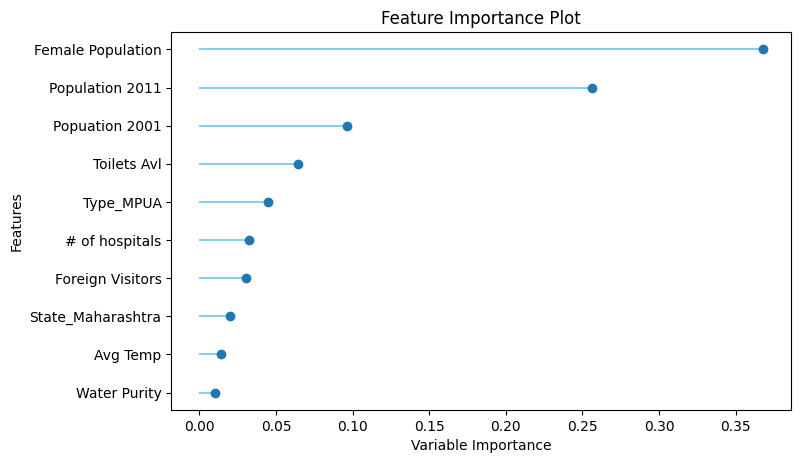

In [ ]:
plot_model(gbr, plot = 'feature')

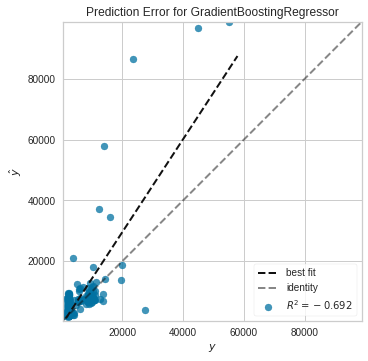

In [ ]:
plot_model(gbr, plot = 'error')

In [ ]:
blend_all = blend_models(estimator_list = [lr,rf,catboost, gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2654.9382,20912244.6421,4572.9908,0.7259,0.6081,0.6254
1,2177.1067,25561007.9348,5055.7895,0.7734,0.9111,0.4501
2,2397.4776,11360124.6835,3370.4784,0.3943,0.6644,0.7070
3,2074.5593,10713863.2340,3273.2038,0.2474,0.7734,0.7032
4,5659.3393,559255977.5895,23648.5936,0.3329,0.7083,0.5550
5,3971.8858,116076969.0849,10773.9022,0.8527,0.8747,0.7380
6,2381.9722,28630326.4318,5350.7314,-0.0895,0.6521,0.5581
7,4472.3490,120222043.3076,10964.5813,0.6967,0.6751,0.7009
8,5277.7516,325410136.3677,18039.1279,0.5649,0.5894,0.4049
9,2080.1955,28262806.2601,5316.2775,-1.1420,0.6854,0.8939


In [ ]:
# check predictions on hold-out
predict_model(blend_all);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3246.9297,1.060405e+08,10297.5945,-2.0692,0.7166,0.5685


In [ ]:
final_blender = finalize_model(blend_all)
print(final_blender)

VotingRegressor(estimators=[('Linear Regression_0',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('Random Forest Regressor_1',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=10,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_sample...
                                     

In [ ]:
predictions = predict_model(final_blender, data = test)
predictions.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Label
index,,,,,,,,,,,,,,,,
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0,3169.3361
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0,3913.2442
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0,1827.5080
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0,2845.6070
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0,-1259.1792


In [ ]:
submission = pd.DataFrame({
        "City": test["City"],
        "Covid Cases": predictions
    })

submission.to_csv('Covid_cases_submission.csv', index=False)